In [58]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [59]:
data=pd.read_csv('/home/mohamed/Downloads/Documents/Chocolate Sales.csv')

In [60]:
data.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184


In [61]:
data.shape

(1094, 6)

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   1094 non-null   object
 1   Country        1094 non-null   object
 2   Product        1094 non-null   object
 3   Date           1094 non-null   object
 4   Amount         1094 non-null   object
 5   Boxes Shipped  1094 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 51.4+ KB


Rows: 1094

Columns: 6

No missing values detected

Most columns are object type

Only one numerical column (Boxes Shipped)

In [63]:
data.describe()

,Boxes Shipped
count,1094.000000
mean,161.797989
std,121.544145
min,1.000000
25%,70.000000
50%,135.000000
75%,228.750000
max,709.000000


In [64]:
data['Amount']=data['Amount'].str.replace('$','').str.replace(',','')

In [65]:
data['Amount']=data['Amount'].astype(int)

In [66]:
data['Date']=pd.to_datetime(data['Date'])

/tmp/ipykernel_2651/1428478067.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date']=pd.to_datetime(data['Date'])


Remove currency symbols $ and commas , from the Amount column.

Convert Amount to numeric type (int).

Convert Date from string to datetime.

In [67]:
data['box_price']=data['Amount']/data['Boxes Shipped']
data['dayes']=data['Date'].dt.day_name()
data['months']=data['Date'].dt.month_name()

Create box_price to calculate price per box by dividing total amount by shipped boxes.

Extract day name from Date into dayes.

Extract month name from Date into months.

In [68]:
data.describe()

,Date,Amount,Boxes Shipped,box_price
count,1094,1094.000000,1094.000000,1094.000000
mean,2022-05-03 09:04:56.160877568,5652.308044,161.797989,105.720204
min,2022-01-03 00:00:00,7.000000,1.000000,0.013514
25%,2022-03-02 00:00:00,2390.500000,70.000000,14.592563
50%,2022-05-11 00:00:00,4868.500000,135.000000,36.141844
75%,2022-07-04 00:00:00,8027.250000,228.750000,79.160357
max,2022-08-31 00:00:00,22050.000000,709.000000,4291.000000
std,NaN,4102.442014,121.544145,278.658429



Provides a statistical summary of numerical columns including count, mean, min, quartiles, and standard deviation to understand distributions and detect outliers.
Max box_price = 4291, while:

Q3 ≈ 79

Mean ≈ 105

👉 Indicates extreme outliers, likely due to very low box counts or data issues.

In [69]:
countre_sales=data.groupby('Country').agg({'Amount':'sum','Boxes Shipped':'sum'}).sort_values(by='Boxes Shipped',ascending=False)
countre_sales

,Amount,Boxes Shipped
Country,,
Australia,1137367,32647
Canada,962899,31221
UK,1051792,30265
India,1045800,29470
USA,1035349,26824
New Zealand,950418,26580


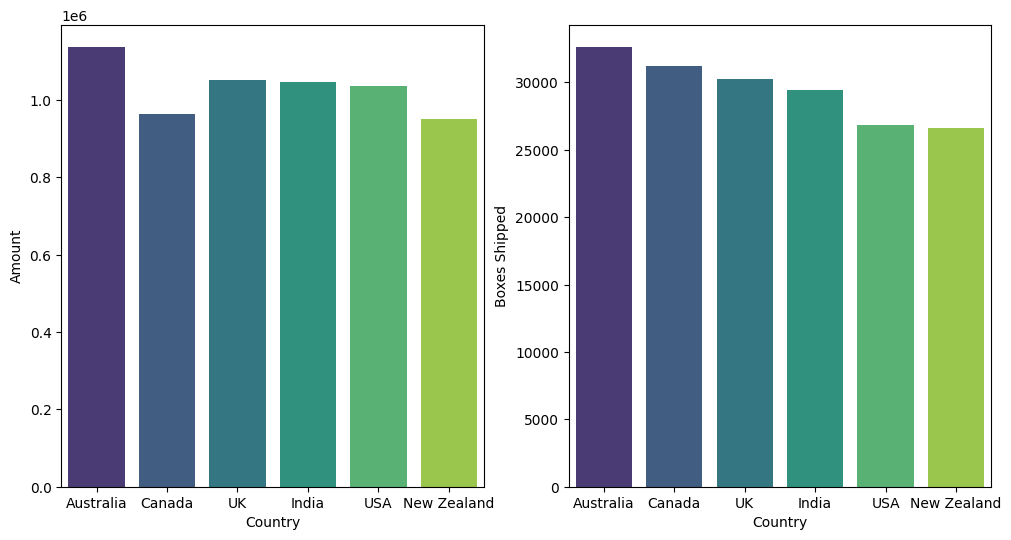

In [70]:
fig,axes=plt.subplots(1,2,figsize=(12,6))
sns.barplot(data=countre_sales,x='Country',y='Amount',ax=axes[0],palette='viridis')
sns.barplot(data=countre_sales,x='Country',y='Boxes Shipped',ax=axes[1],palette='viridis')
plt.show()

Australia leads in shipment volume

Canada and UK follow closely

USA is not the top market in volume despite its expected size

In [71]:
trend_prodect=data.groupby('Country')['Product'].value_counts(ascending=False).groupby('Country').head(3).reset_index()
trend_prodect

,Country,Product,count
0,Australia,50% Dark Bites,16
1,Australia,Drinking Coco,12
2,Australia,Organic Choco Syrup,12
3,Canada,Smooth Sliky Salty,12
4,Canada,Spicy Special Slims,11
5,Canada,Choco Coated Almonds,10
6,India,Eclairs,15
7,India,Spicy Special Slims,14
8,India,Smooth Sliky Salty,11
9,New Zealand,Mint Chip Choco,14


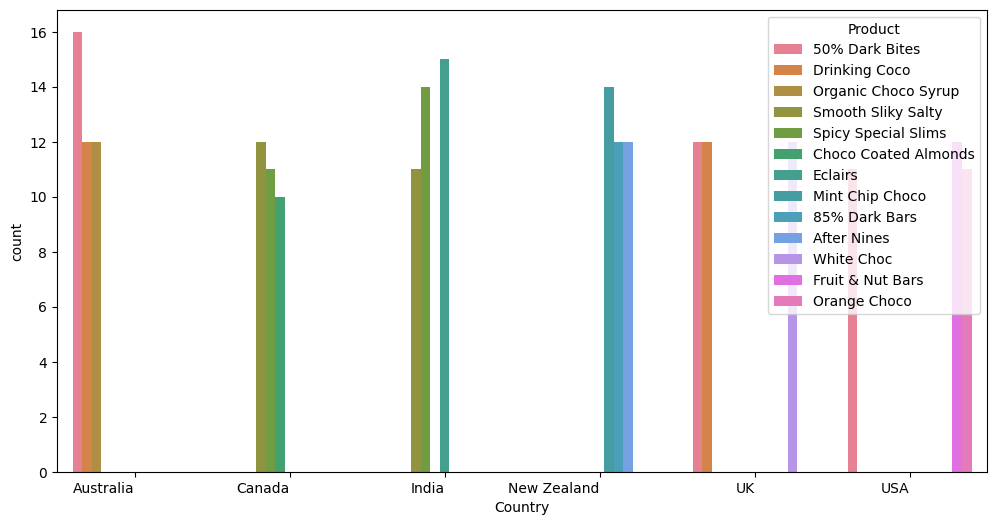

In [72]:
plt.figure(figsize=(12,6))
sns.barplot(data=trend_prodect,x='Country',y='count',hue='Product')
plt.xticks(ha='right')
plt.show()

Each country shows top 3 products by shipment count.

Product preferences vary by country:

Australia: 50% Dark Bites leads

Canada: Smooth Sliky Salty leads

India: Eclairs leads

In [73]:
product_sales=data.groupby('Product').agg({'Amount':'sum','Boxes Shipped':'sum'}).sort_values(by='Boxes Shipped',ascending=False)
product_sales

,Amount,Boxes Shipped
Product,,
50% Dark Bites,341712,9792
Smooth Sliky Salty,349692,8810
Eclairs,312445,8757
Caramel Stuffed Bars,231588,8717
Spicy Special Slims,293454,8685
Drinking Coco,256655,8660
Milk Bars,269248,8330
Peanut Butter Cubes,324842,8304
After Nines,261331,8257


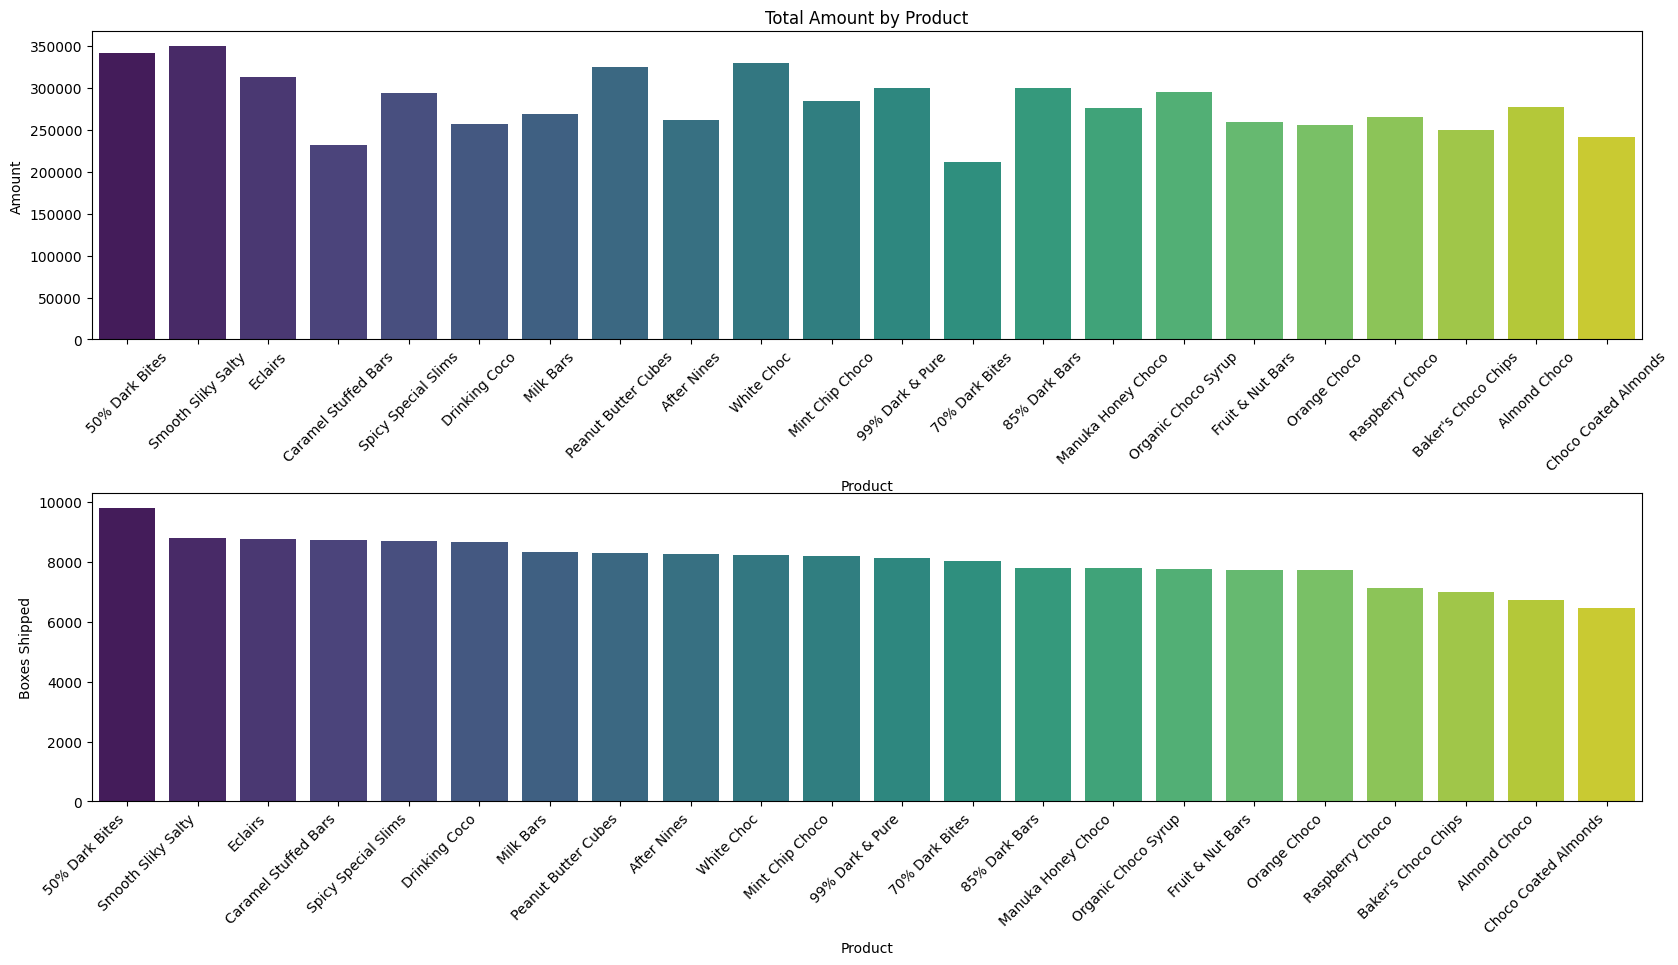

In [74]:
fig,axes=plt.subplots(2,1,figsize=(20,10))
sns.barplot(data=product_sales,x='Product',y='Amount',ax=axes[0],palette='viridis')
axes[0].set_title('Total Amount by Product')
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(data=product_sales,x='Product',y='Boxes Shipped',ax=axes[1],palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.subplots_adjust(hspace=0.5)
plt.show()


Some products dominate shipment numbers, but not necessarily revenue.

Analysis helps identify trending products in the market.

In [75]:
Sales_Person=data.groupby('Sales Person').agg({'Amount':'sum','Boxes Shipped':'sum'}).sort_values(by='Amount',ascending=False).head(10)
Sales_Person

,Amount,Boxes Shipped
Sales Person,,
Ches Bonnell,320901,7522
Oby Sorrel,316645,8608
Madelene Upcott,316099,7279
Brien Boise,312816,8102
Kelci Walkden,311710,8702
Van Tuxwell,303149,6799
Dennison Crosswaite,291669,8767
Beverie Moffet,278922,9214
Kaine Padly,266490,7253


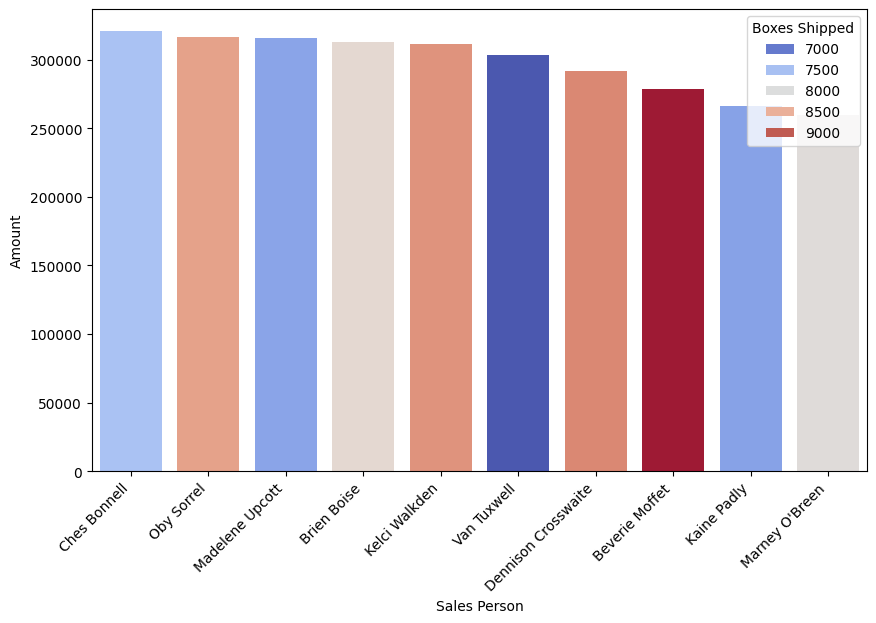

In [76]:
plt.figure(figsize=(10,6))
sns.barplot(data=Sales_Person,x='Sales Person',y='Amount',hue='Boxes Shipped',palette='coolwarm')
plt.xticks(rotation=45,ha='right')
plt.show()


Top sales: Ches Bonnell → $320,901

Highest boxes shipped: Beverie Moffet → 9,214 boxes

Some salespeople achieve high sales with fewer boxes, indicating higher box price.
Some salespeople sell many boxes at lower price, others fewer boxes at higher price.

Helps define personalized incentive strategies.

In [77]:

sales_person_bycountre=data.groupby(['Country','Sales Person'])['Boxes Shipped'].sum().reset_index().sort_values(['Country','Boxes Shipped'],ascending=[True,False]).groupby('Country').head(3)
sales_person_bycountre

,Country,Sales Person,Boxes Shipped
2,Australia,Beverie Moffet,2209
16,Australia,Kelci Walkden,2060
17,Australia,Madelene Upcott,2010
40,Canada,Karlen McCaffrey,2266
44,Canada,Marney O'Breen,2181
45,Canada,Oby Sorrel,2076
65,India,Karlen McCaffrey,2276
66,India,Kelci Walkden,2085
62,India,Jan Morforth,2030
76,New Zealand,Barr Faughny,1668


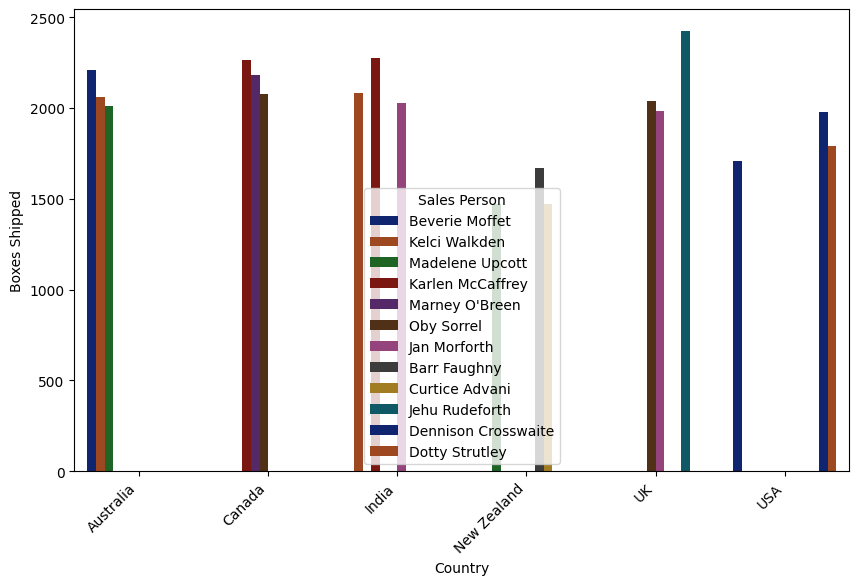

In [78]:

plt.figure(figsize=(10,6))
sns.barplot(data=sales_person_bycountre,x='Country',y='Boxes Shipped',hue='Sales Person',palette='dark')
plt.xticks(rotation=45,ha='right')
plt.show()

Each country shows top 3 salespeople:

Australia: Beverie Moffet, Kelci Walkden, Madelene Upcott

Canada: Karlen McCaffrey, Marney O'Breen, Oby Sorrel

USA: Dennison Crosswaite, Dotty Strutley, Beverie Moffet

Highlights who contributes most to shipment volume per market

Top salespeople by shipment volume vary by country.

Shipment volume is important for local market performance, but financial value is also crucial.

In [79]:
top_products_per_salesperson = (
    data.groupby(['Sales Person', 'Product'])['Boxes Shipped']
        .sum()                       
        .reset_index()                
        .sort_values(['Sales Person','Boxes Shipped'], ascending=[True, False]) 
        .groupby('Sales Person')    
        .head(3)                     
)

top_products_per_salesperson


,Sales Person,Product,Boxes Shipped
11,Andria Kimpton,Manuka Honey Choco,865
0,Andria Kimpton,50% Dark Bites,758
16,Andria Kimpton,Peanut Butter Cubes,732
33,Barr Faughny,Mint Chip Choco,926
21,Barr Faughny,50% Dark Bites,793
...,...,...,...
460,Van Tuxwell,Almond Choco,666
461,Van Tuxwell,Baker's Choco Chips,523
490,Wilone O'Kielt,Organic Choco Syrup,440
483,Wilone O'Kielt,Drinking Coco,436


Each salesperson has top 3 products that make up most of their shipments.

Examples:

Andria Kimpton: Manuka Honey Choco, 50% Dark Bites, Peanut Butter Cubes

Barr Faughny: Mint Chip Choco, 50% Dark Bites, ...

Adding average box price per product per salesperson provides clearer insight on most profitable products.
Each salesperson has key products driving their sales.

Focusing on these products helps optimize sales and marketing strategies per salesperson.
Business Recommendation
Allocate stock and promotions for each salesperson based on top 3 products.

Combine with average box price to identify most profitable products.

Use this info to design customized incentive programs.

In [80]:
saels_by_month=data.groupby('months')['Boxes Shipped'].sum().reset_index()
saels_by_month

,months,Boxes Shipped
0,April,21003
1,August,19901
2,February,18015
3,January,27535
4,July,22876
5,June,26260
6,March,19561
7,May,21856


<Axes: xlabel='months', ylabel='Boxes Shipped'>

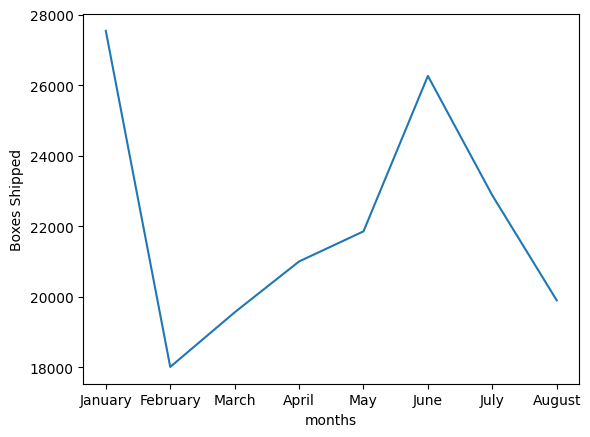

In [81]:
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                'July', 'August', 'September', 'October', 'November', 'December']
saels_by_month['months'] = pd.Categorical(saels_by_month['months'], categories=months_order, ordered=True)
sns.lineplot(data=saels_by_month,x='months',y='Boxes Shipped')

January and June are peak shipment months → opportunity to boost inventory and marketing campaigns.

February and August are low shipment months → investigate causes of lower sales.


In [82]:
saels_by_month=data.groupby('Product')['box_price'].agg(['mean','max','min']).sort_values(by='mean')
saels_by_month

,mean,max,min
Product,,,
70% Dark Bites,58.789504,684.133333,0.750789
Drinking Coco,62.866962,768.600000,0.502242
Caramel Stuffed Bars,74.604475,934.500000,0.549020
Almond Choco,74.745097,626.888889,0.840000
After Nines,74.939872,919.000000,0.600000
Manuka Honey Choco,79.354147,857.818182,0.679612
Milk Bars,81.873545,627.000000,1.884615
Smooth Sliky Salty,88.729109,848.909091,0.013514
Raspberry Choco,90.046391,700.000000,2.906250


Some products have extreme price variation (e.g., White Choc: min=3.85, max=4291).

Could indicate data entry errors or different box sizes.

Mean alone may be misleading if there are outliers.

Median can provide a better sense of typical price.

The dataset contains sales information (Amount, Boxes Shipped, Box Price, Products, Salespersons, Countries, Dates).

Although the dataset is complete and has 1094 rows, there are major issues that prevent direct use in predictive or clustering models.

 Key Issues:

Large variation within the same product:

box_price and Amount have extreme outliers (e.g., White Choc: min=3.8, max=4291), which is not commercially logical.

Many outliers:

Most products show huge differences between min and max prices, making the mean unreliable.

Impact on models:

Any Regression or Clustering model would be highly inaccurate due to these outliers.

Need for major cleaning:

Before modeling, data must be validated, outliers corrected, and columns reassessed.

 Conclusion:

The dataset is not suitable for building predictive or clustering models directly.

It could only be used after extensive cleaning and correcting illogical values.